# Project 6. Yandex SQL

В самостоятельном проекте этого курса вы будете работать с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете [Startup Investments][1], опубликованном на популярной платформе для соревнований по исследованию данных Kaggle.

[1]: https://www.kaggle.com/justinas/startup-investments

*Венчурные фонды* — это финансовые организации, которые могут позволить себе высокий риск и инвестировать в компании с инновационной бизнес-идеей или разработанной новой технологией, то есть в стартапы. Цель венчурных фондов — в будущем получить значительную прибыль, которая в разы превысит размер их трат на инвестиции в компанию. Если стартап подорожает, венчурный фонд может получить долю в компании или фиксированный процент от её выручки.

Чтобы процесс финансирования стал менее рискованным, его делят на стадии — `раунды`. Тот или иной раунд зависит от того, какого уровня развития достигла компания.

Первые этапы — `предпосевной` и `посевной` раунды. `Предпосевной` раунд предполагает, что компания как таковая ещё не создана и находится в стадии замысла. Следующий — `посевной` — раунд знаменует рост проекта: создатели компании разрабатывают бизнес-модель и привлекают инвесторов.

Если компании требуется `ментор` или `наставник` — она привлекает `бизнес-ангела`. Бизнес-ангелы — инвесторы, которые помимо финансовой поддержки предлагают экспертную помощь. Такой `раунд называют ангельским`.

Когда стартап становится компанией с проверенной бизнес-моделью и начинает зарабатывать самостоятельно, предложений инвесторов становится больше. Это раунд **A**, а за ним следуют и другие: **B**, **C**, **D** — на этих этапах компания активно развивается и готовится к **IPO**.

Иногда выделяют венчурный раунд — финансирование, которое могло поступить от венчурного фонда на любом этапе: начальном или более позднем.

В данных об инвестициях вам встретятся упоминания раундов, но самостоятельный проект не предполагает, что вы должны разбираться в их специфике лучше любого инвестора. Главное — понимать, как устроены данные.

Вы уже знаете, что такое ER-диаграмма. Работу с новой базой данных лучше начать с изучения схемы.

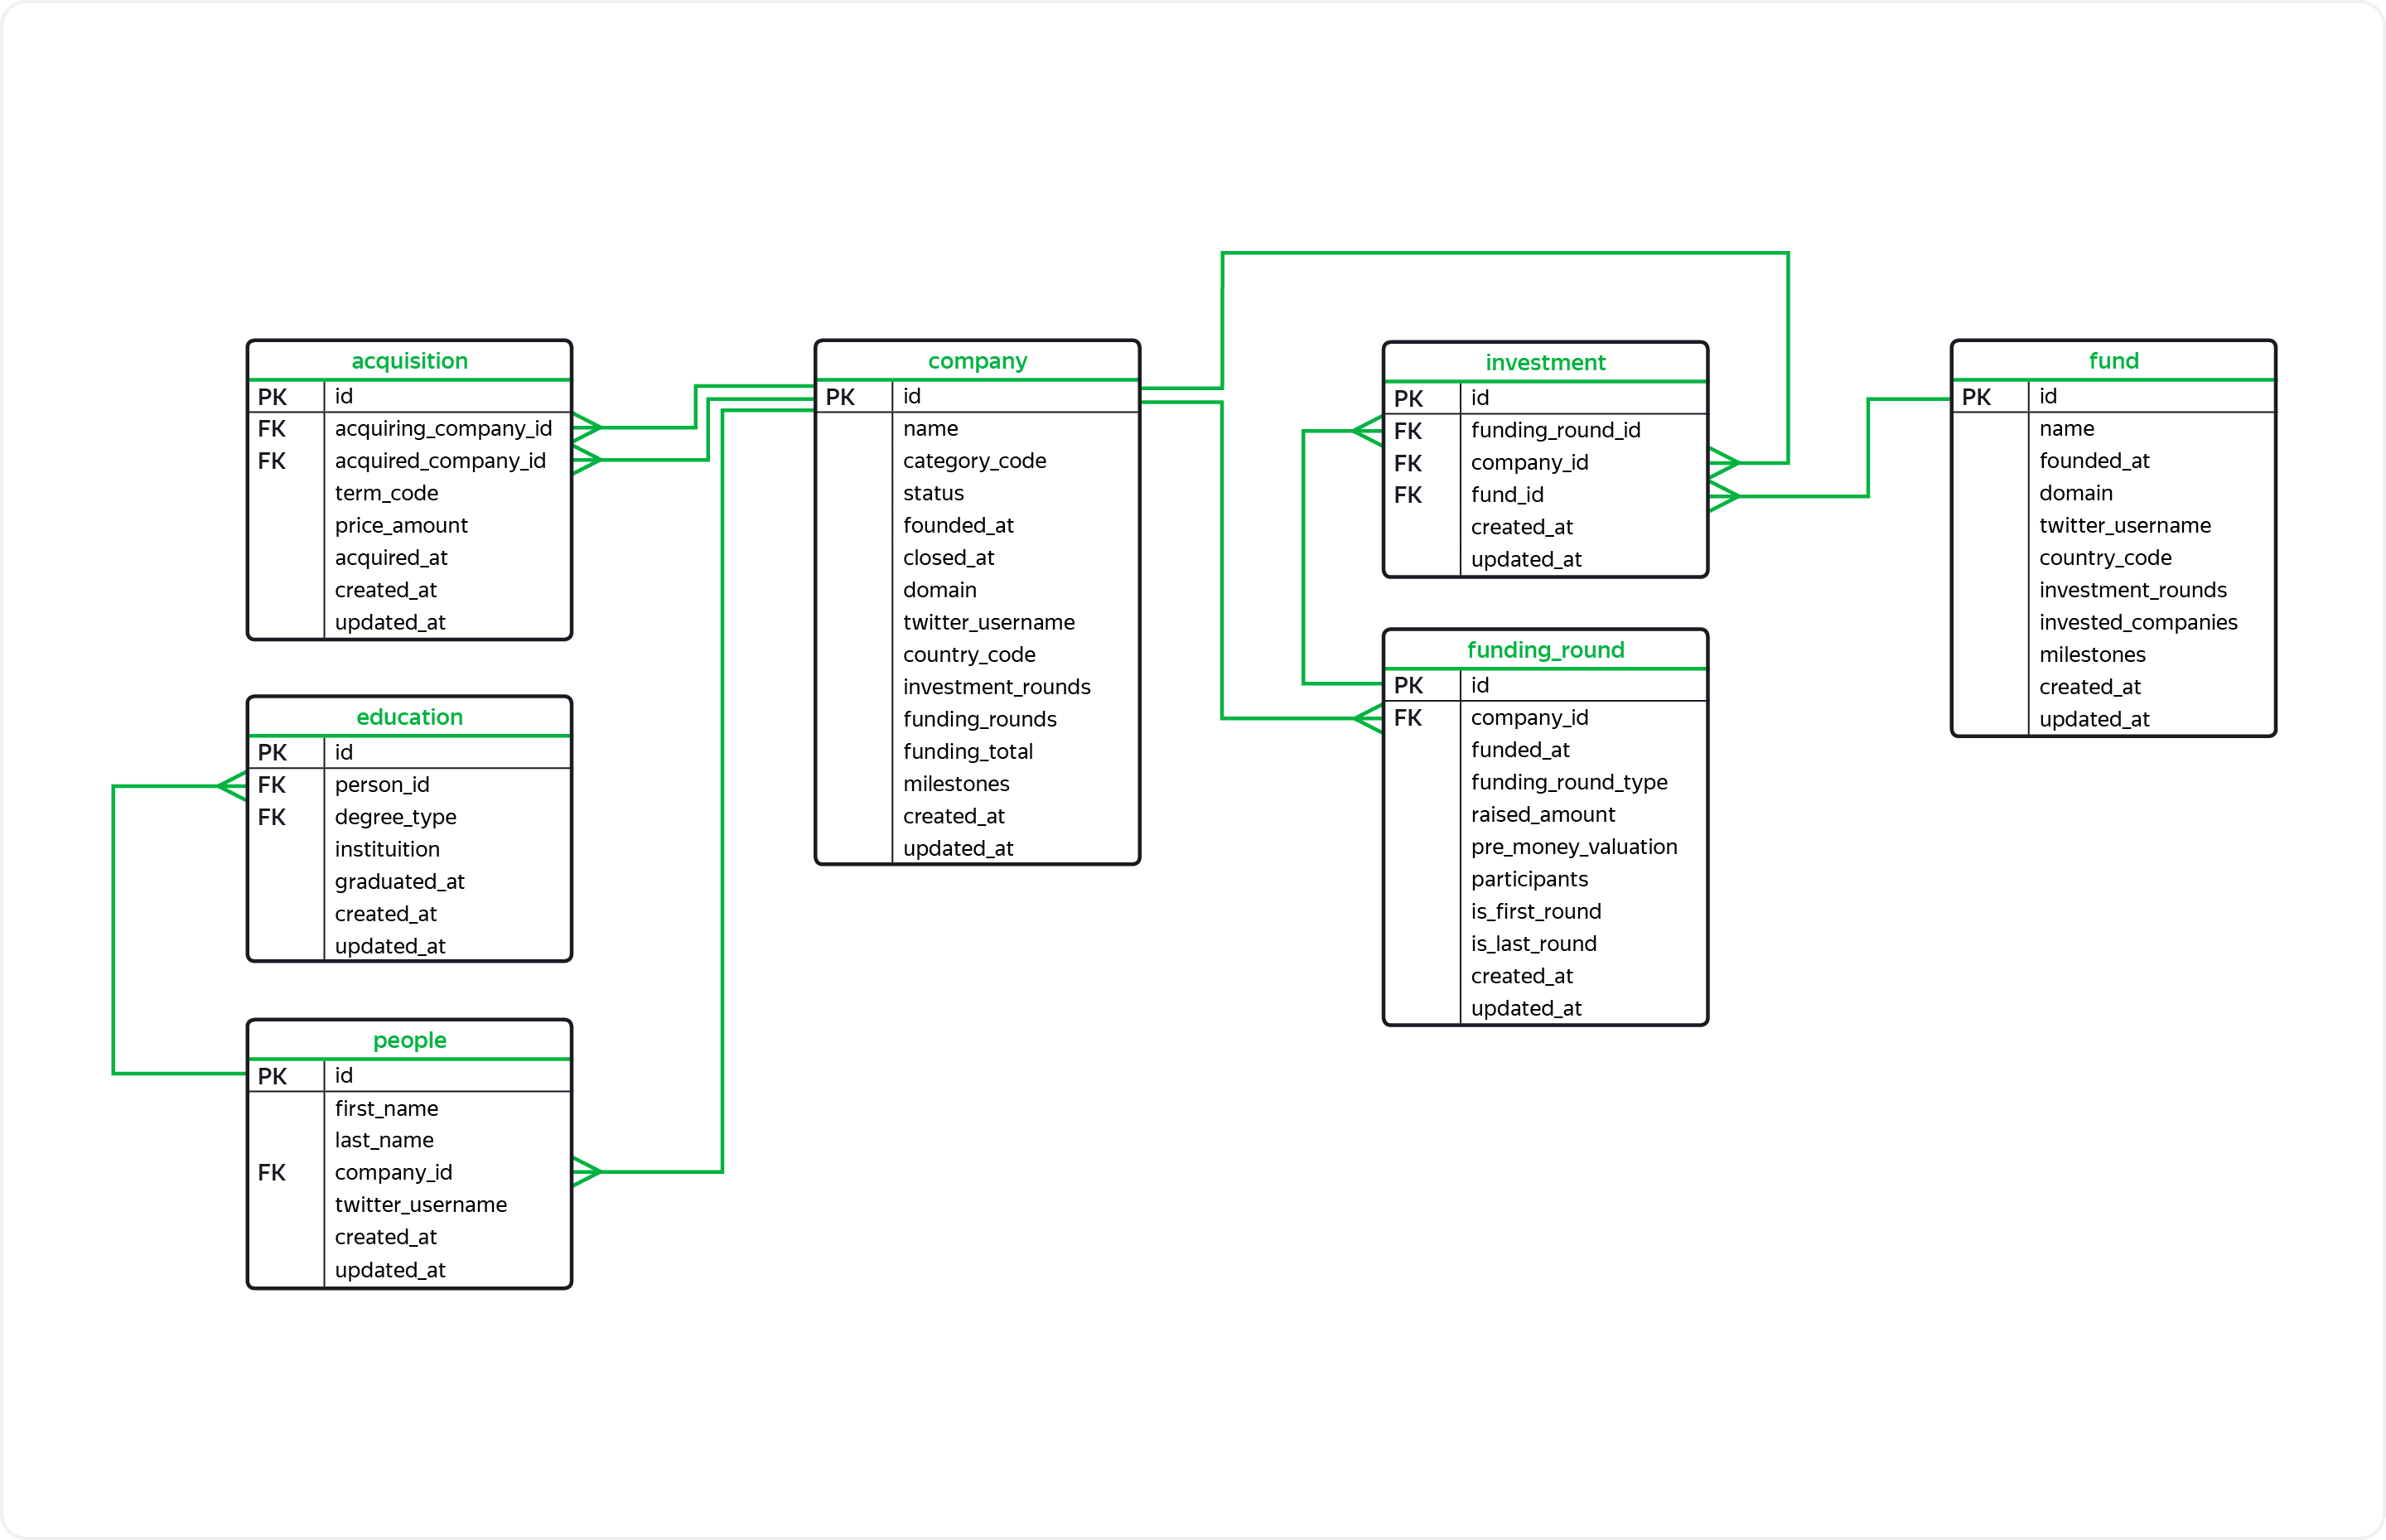

Теперь можно познакомиться с данными, которые хранят таблицы.

**acquisition**

Содержит информацию о покупках одних компаний другими. Таблица включает такие поля:
* первичный ключ `id` — идентификатор или уникальный номер покупки;
* внешний ключ `acquiring_company_id` — ссылается на таблицу company — идентификатор компании-покупателя, то есть той, что покупает другую компанию;
* внешний ключ `acquired_company_id` — ссылается на таблицу company — идентификатор компании, которую покупают;
* `term_code` — способ оплаты сделки:
    * `cash` — наличными;
    * `stock` — акциями компании;
    * `cash_and_stock` — смешанный тип оплаты: наличные и акции.
* `price_amount` — сумма покупки в долларах;
* `acquired_at` — дата совершения сделки;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**company**

Содержит информацию о компаниях-стартапах.
* первичный ключ `id` — идентификатор, или уникальный номер компании;
* `name` — название компании;
* `category_code` — категория деятельности компании, например:
    * `news` — специализируется на работе с новостями;
    * `social` — специализируется на социальной работе.
* `status` — статус компании:
    * `acquired` — приобретена;
    * `operating` — действует;
    * `ipo` — вышла на IPO;
    * `closed` — перестала существовать.
* `founded_at` — дата основания компании;
* `closed_at` — дата закрытия компании, которую указывают в том случае, если компании больше не существует;
* `domain` — домен сайта компании;
* `twitter_username` — название профиля компании в твиттере;
* `country_code` — код страны, например, USA для США, GBR для Великобритании;
* `investment_rounds` — число раундов, в которых компания участвовала как инвестор;
* `funding_rounds` — число раундов, в которых компания привлекала инвестиции;
* `funding_total` — сумма привлечённых инвестиций в долларах;
* `milestones` — количество важных этапов в истории компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**education**

Хранит информацию об уровне образования сотрудников компаний.
* первичный ключ `id` — уникальный номер записи с информацией об образовании;
* внешний ключ `person_id` — ссылается на таблицу `people` — идентификатор человека, информация о котором представлена в записи;
* `degree_type` — учебная степень, например:
    * `BA` — Bachelor of Arts — бакалавр гуманитарных наук;
    * `MS` — Master of Science — магистр естественных наук.
* `instituition` — учебное заведение, название университета;
* `graduated_at` — дата завершения обучения, выпуска;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**fund**

Хранит информацию о венчурных фондах.
* первичный ключ `id` — уникальный номер венчурного фонда;
* `name` — название венчурного фонда;
* `founded_at` — дата основания фонда;
* `domain` — домен сайта фонда;
* `twitter_username` — профиль фонда в твиттере;
* `country_code` — код страны фонда;
* `investment_rounds` — число инвестиционных раундов, в которых фонд принимал участие;
* `invested_companies` — число компаний, в которые инвестировал фонд;
* `milestones` — количество важных этапов в истории фонда;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.


**funding_round**

Содержит информацию о раундах инвестиций.
* первичный ключ `id` — уникальный номер инвестиционного раунда;
* внешний ключ `company_id` — ссылается на таблицу company — уникальный номер компании, участвовавшей в инвестиционном раунде;
* `funded_at` — дата проведения раунда;
* `funding_round_type` — тип инвестиционного раунда, например:
    * `venture` — венчурный раунд;
    * `angel` — ангельский раунд;
    * `series_a` — раунд А.
* `raised_amount` — сумма инвестиций, которую привлекла компания в этом раунде в долларах;
* `pre_money_valuation` — предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
* `participants` — количество участников инвестиционного раунда;
* `is_first_round` — является ли этот раунд первым для компании;
* `is_last_round` — является ли этот раунд последним для компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**investment**

Содержит информацию об инвестициях венчурных фондов в компании-стартапы.
* первичный ключ `id` — уникальный номер инвестиции;
* внешний ключ `funding_round_id` — ссылается на таблицу funding_round — уникальный номер раунда инвестиции;
* внешний ключ `company_id` — ссылается на таблицу company — уникальный номер компании-стартапа, в которую инвестируют;
* внешний ключ `fund_id` — ссылается на таблицу fund — уникальный номер фонда, инвестирующего в компанию-стартап;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.


**people**

Содержит информацию о сотрудниках компаний-стартапов.
* первичный ключ `id` — уникальный номер сотрудника;
* `first_name` — имя сотрудника;
* `last_name` — фамилия сотрудника;
* внешний ключ `company_id` — ссылается на таблицу company — уникальный номер компании-стартапа;
* `twitter_username` — профиль сотрудника в твиттере;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

# Задания:

## Задание 1

Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT COUNT(*)
FROM company
WHERE status LIKE '%closed%';

## Задание 2

Отобразите количество привлечённых средств для новостных компании США. Используйте данные из таблицы `company`. Отсортируйте таблицу по убыванию значений в поле `funding_total`.

In [ ]:
SELECT funding_total
FROM company
WHERE category_code = 'news'
  AND country_code = 'USA'
ORDER BY funding_total DESC;

## Задание 3

Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
  AND CAST(acquired_at AS date) BETWEEN '2011-01-01' AND '2013-12-31';

## Задание 4

Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на `'Silver'`.

In [ ]:
SELECT first_name,
       last_name ,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%';

## Задание 5

Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку `'money'`, а фамилия начинается на `'K'`.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
  AND last_name LIKE 'K%';

## Задание 6

Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT SUM(funding_total) AS sum_total,
       country_code
FROM company
GROUP BY country_code
ORDER BY sum_total DESC;

## Задание 7

Составьте таблицу, в которую войдёт **дата проведения раунда**, а также **минимальное** и **максимальное значения суммы инвестиций**, привлечённых в эту дату. Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT CAST (funded_at AS date) AS act_date,
       MIN(raised_amount) AS min_raised_amount,
       MAX(raised_amount) AS max_raised_mount
FROM funding_round
GROUP BY act_date
HAVING MIN(raised_amount) != 0 
   AND MIN(raised_amount) != MAX(raised_amount);

## Задание 8

Создайте поле с категориями:
* Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
* Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `middle_activity`.
* Если количество инвестируемых компаний фонда не превышает 20, назначьте категорию `low_activity`.

Отобразите все поля таблицы `fund` и новое поле с категориями.

In [ ]:
SELECT *,
       CASE
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
           ELSE 'low_activity'
       END
FROM fund;

## Задание 9

Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT ROUND(AVG(investment_rounds)) AS mean_rounds,
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund
GROUP BY activity
ORDER BY mean_rounds;

## Задание 10

Выгрузите таблицу с десятью самыми активными инвестирующими странами. Активность страны определите по среднему количеству компаний, в которые инвестируют фонды этой страны. Для каждой страны посчитайте **минимальное**, **максимальное** и **среднее число компаний**, в которые инвестировали фонды, основанные с 2010 по 2012 год включительно. **Исключите** из таблицы страны с фондами, у которых минимальное число инвестируемых компаний равно нулю. Для фильтрации диапазона по годам используйте оператор BETWEEN.

In [ ]:
SELECT MIN(invested_companies) AS min_value,
       MAX(invested_companies) AS max_value,
       AVG(invested_companies) AS avg_value,
       country_code
FROM fund
WHERE EXTRACT(YEAR FROM founded_at) between 2010 and 2012
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY avg_value DESC
LIMIT 10;

## Задание 11

Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT p.first_name,
       p.last_name, 
       e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id;

## Задание 12

Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
       COUNT(DISTINCT e.instituition)     
FROM company as c
INNER JOIN people AS p ON c.id = p.company_id
INNER JOIN education AS e ON p.id = e.person_id
GROUP BY c.name
ORDER BY COUNT(DISTINCT e.instituition)  DESC
LIMIT 5;

## Задание 13

Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT c.name
FROM company AS c
INNER JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.status = 'closed'
 AND (fr.is_first_round = 1 
     AND fr.is_last_round = 1);

## Задание 14

Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT DISTINCT p.id
FROM company AS c
INNER JOIN funding_round AS fr ON c.id = fr.company_id
INNER JOIN people AS p ON c.id = p.company_id

WHERE c.status = 'closed'
 AND (fr.is_first_round = 1 
     AND fr.is_last_round = 1);

## Задание 15

Составьте таблицу, куда войдут уникальные номера сотрудников из предыдущей задачи, а также учебное заведение, которое окончил сотрудник.

In [ ]:
SELECT people.id, 
       e.instituition
FROM people 
JOIN education AS e ON people.id = e.person_id
WHERE company_id in (
                     SELECT id
                     FROM company
                     WHERE id in (
                                  SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1
                                    AND is_last_round  = 1
                                 )
                     AND status = 'closed'
                    );

## Задание 16

Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания.

In [ ]:
SELECT people.id, 
       COUNT (e.instituition)
FROM people 
JOIN education AS e ON people.id = e.person_id
WHERE company_id in (
                     SELECT id
                     FROM company
                     WHERE id in (
                                  SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1
                                    AND is_last_round  = 1
                                 )
                     AND status = 'closed'
                    )
GROUP BY people.id;

## Задание 17

Выведите среднее число учебных заведений, которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
WITH 
-- первый подзапрос с число сотрудников окончивших университет в закрытых компания:
numb_uni AS (
             SELECT people.id AS peo_id, 
                    COUNT (e.instituition) AS uni_number
             FROM people 
             JOIN education AS e ON people.id = e.person_id
             WHERE company_id in (
                                  SELECT id
                                  FROM company
                                  WHERE id in (
                                               SELECT company_id
                                               FROM funding_round
                                               WHERE is_first_round = 1
                                                 AND is_last_round  = 1
                                              )
                                  AND status = 'closed'
                                 )
            GROUP BY people.id
            )
            
-- основной запрос, среднее число сотрудников окончивших университет
SELECT AVG(numb_uni.uni_number)
FROM numb_uni;

## Задание 18

Выведите среднее число учебных заведений, которые окончили сотрудники компании Facebook.

In [ ]:
WITH 
-- первый подзапрос с число сотрудников окончивших университет в Facebook:
numb_uni AS (
             SELECT people.id AS peo_id, 
                    COUNT (e.instituition) AS uni_number
             FROM people 
             JOIN education AS e ON people.id = e.person_id
             WHERE company_id in (
                                  SELECT id
                                  FROM company
                                  WHERE name = 'Facebook'
                                 )
            GROUP BY people.id
            )
            
-- основной запрос, среднее число сотрудников окончивших университет
SELECT AVG(numb_uni.uni_number)
FROM numb_uni;

## Задание 19

Составьте таблицу из полей:
1. `name_of_fund` — название фонда;
2. `name_of_company` — название компании;
3. `amount` — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name           AS name_of_fund   ,
       c.name           AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS inv
INNER JOIN company       AS  c ON inv.company_id =  c.id
INNER JOIN fund          AS  f ON inv.fund_id    =  f.id
INNER JOIN (SELECT company_id,
                   id        ,
                   raised_amount
            FROM funding_round
            WHERE EXTRACT(YEAR FROM funded_at) BETWEEN 2012 and 2013
           ) AS fr ON fr.id = inv.funding_round_id
WHERE c.milestones > 6

## Задание 20

Выгрузите таблицу, в которой будут такие поля:
1. название компании-покупателя;
2. сумма сделки;
3. название компании, которую купили;
4. сумма инвестиций, вложенных в купленную компанию;
5. доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. Отсортируйте таблицу по сумме сделки от большей к меньшей. Ограничьте таблицу первыми десятью записями.

In [ ]:
SELECT c1.name,
       acq.price_amount,
       c2.name, 
       c2.funding_total,
       ROUND(acq.price_amount/c2.funding_total) AS perc

FROM (SELECT * 
      FROM acquisition 
      WHERE price_amount != 0) AS acq  
      
INNER JOIN company AS c1 on acq.acquiring_company_id = c1.id
INNER JOIN (SELECT * 
            FROM company 
            WHERE funding_total != 0) AS c2 ON acq.acquired_company_id = c2.id

ORDER BY acq.price_amount DESC
LIMIT 10

## Задание 21

Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
WITH
--
soc_company AS (SELECT id AS c_id,
                       name AS c_name
                FROM company
                WHERE category_code = 'social'),
--
fin AS (SELECT company_id AS com_id,
               EXTRACT(MONTH FROM CAST(funded_at AS date)) AS months
        FROM funding_round
        WHERE EXTRACT(YEAR FROM funded_at) BETWEEN 2010 AND 2013)
        
--
SELECT soc_company.c_name,
       fin. months
FROM soc_company
INNER JOIN fin ON soc_company.c_id = fin.com_id

## Задание 22

Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
* номер месяца, в котором проходили раунды;
* количество уникальных названий фондов из США, которые инвестировали в этом месяце;
* количество компаний, купленных за этот месяц;
* общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH 
-- The first request - Get company information
acq_comp AS (SELECT  SUM(price_amount)                             AS sum_price   ,
                     COUNT(acquired_company_id)                    AS name_company,
                     EXTRACT(MONTH FROM CAST(acquired_at AS date)) AS months
             FROM acquisition
             WHERE EXTRACT(YEAR FROM CAST(acquired_at AS date)) BETWEEN 2010 AND 2013
             GROUP BY months
             ORDER BY months),
             
-- The second request - Get fund index and months
fund_comp AS (SELECT COUNT(DISTINCT f.name)                  AS name_fund,
              EXTRACT(MONTH FROM CAST(fr.funded_at AS date)) AS months
              FROM funding_round AS fr
              INNER JOIN investment AS inv ON fr.id       = inv.funding_round_id
              INNER JOIN fund       AS   f ON inv.fund_id = f.id
              WHERE f.country_code = 'USA' 
                AND EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2010 AND 2013
              GROUP BY months
              ORDER BY months)
              
-- The main request
SELECT acq_comp.months,
       fund_comp.name_fund,
       acq_comp.name_company,
       acq_comp.sum_price
FROM acq_comp
INNER JOIN fund_comp ON acq_comp.months = fund_comp.months

## Задание 23

Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH
-- The first request for 2011 year
y2011 AS (SELECT country_code  AS country,
          AVG(funding_total)   AS avg_2011
          FROM company
          WHERE EXTRACT(YEAR FROM CAST(founded_at AS DATE)) = '2011'
          GROUP BY country),
          
-- The second request for 2012 year
y2012 AS (SELECT country_code AS country,
          AVG(funding_total)  AS avg_2012
          FROM company
          WHERE EXTRACT(YEAR FROM CAST(founded_at AS DATE)) = '2012'
          GROUP BY country),
          
-- The third request for 2013 year
y2013 AS (SELECT country_code AS country,
          AVG(funding_total)  AS avg_2013
          FROM company
          WHERE EXTRACT(YEAR FROM CAST(founded_at AS DATE)) = '2013'
          GROUP BY country)
          
-- The main request
SELECT y2011.country,
       y2011.avg_2011,
       y2012.avg_2012,
       y2013.avg_2013
FROM y2011
INNER JOIN y2012 ON y2011.country = y2012.country
INNER JOIN y2013 ON y2011.country = y2013.country

ORDER BY y2011.avg_2011 DESC